# Avaliação 2 - Introdução à Ciência de Dados
## Análise do banco de dados *Police Violence & Racial Equity - Part 2 of 3*
### Felipe Lamarca e Guilherme Melo

#### Introdução
As relações raciais nos Estados Unidos são tema de pesquisa de uma série de estudiosos da área das ciências humanas e sociais, em especial na Sociologia, na Antropologia e na História. Autoras como Angela Davis, bell hooks e Patricia Hill Collins foram responsáveis por inserir a temática da interseccionalidade nesses estudos, na medida em que atentam para a importância de se analisar os pontos de interseção entre raça, gênero e classe, ao mesmo tempo que adotam pontos de vista antirracistas e decoloniais.

Os Estados Unidos são historicamente marcados pela segregação racial. O fim do regime escravocrata deu lugar a uma sociedade de "iguais, mas separados", de modo que as leis Jim Crow referendavam um regime de *apartheid* que ainda existia a nível de lei até a década de 1960. Décadas mais tarde, com a eleição de Barack Obama, surge a hipótese de que a tensão racial em solo norte-americano poderia ter pedido força - afinal, tratava-se de um presidente negro eleito pelo partido Democrata e que defendia pautas progressistas. Por outro lado, pesquisas como a de Stephens-Davidowitz mostram que o racismo ainda é parte do *status quo* norte-americano. No estudo ao qual nos referimos, o autor analisa a disposição geográfica de expressões racistas publicadas na internet a partir de dados do *Google Trends*. Os resultados apontaram altos níveis para os estados do Norte, contrariando, inclusive, a hipótese de que a prática do racismo era comum somente entre os estados do chamado Sul histórico. O assassinato de George Floyd por parte de policiais em 2020 e as manifestações em defesa da população negra dos Estados Unidos que ocorreram em sequência, sob o slogan de *Vidas negras importam*, mostraram como a tensão racial ainda é uma realidade que acomete a vida dos negros do país.

Este trabalho faz uma análise do arquivo *arrests_national_adults.csv*, componente do banco de dados **Police Violence & Racial Equity - Part 2 of 3**, através da linguagem Python. Os dados dizem respeito ao número de adultos presos em cada ano entre 1994 e 2016 para determinados tipos de crime, apontando, ainda, faixa etária, gênero e raça. O objetivo é mapear a população carcerária dos Estados Unidos no período a partir das seguintes perguntas de pesquisa:

- Quais crimes são mais cometidos?
- Qual faixa etária está mais presente nas prisões?
- Quais grupos sociais são mais submetidos a prisões?
- Quais foram as alterações na composição da população carcerária entre 1994 e 2016?

Em primeiro lugar, importamos as bibliotecas que pretendemos utilizar no trabalho:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns

Em seguida, importamos o arquivo .csv que será analisado (*arrests_national_adults.csv*) e mostramos as primeiras 10 linhas.

In [2]:
dados = pd.read_csv(os.path.join('data/crime_data', 'arrests_national_adults.csv'))
dados

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,...,f_50_54,f_55_59,f_60_64,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,...,102,74.0,38.0,28.0,12581,263887632,4263,1373,103,183
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,...,3996,2343.0,961.0,713.0,12581,263887632,183478,94982,5365,6129
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,...,12005,6697.0,3166.0,2344.0,12581,263887632,514297,237138,12418,14376
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,...,1279,621.0,286.0,170.0,12581,263887632,101778,39235,2035,1323
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,...,4085,2464.0,1098.0,928.0,12581,263887632,161655,73552,2556,9460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,416,NaN,1994,ASR_STP,Stolen Property,10713,208091172,84889,13994,8768,...,148,70.0,24.0,41.0,10282,207684879,56631,40612,875,568
640,417,NaN,1994,ASR_SUS,Suspicion,10713,208091172,8230,1465,356,...,15,9.0,5.0,8.0,10282,207684879,4508,5116,26,41
641,418,NaN,1994,ASR_VAG,Vagrancy,10713,208091172,14039,3782,922,...,37,16.0,12.0,16.0,10282,207684879,9716,7678,60,361
642,419,NaN,1994,ASR_VAN,Vandalism,10713,208091172,117143,20803,12776,...,281,128.0,78.0,112.0,10282,207684879,96043,38502,1417,1708


O código a seguir cria uma nova coluna, 'total_pop_presa', que recebe a soma da população masculina e feminina presa para um determinado tipo de crime. O gráfico faz um plot desse total para todo o período 1994-2016.

<ipython-input-3-9841f0611674>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


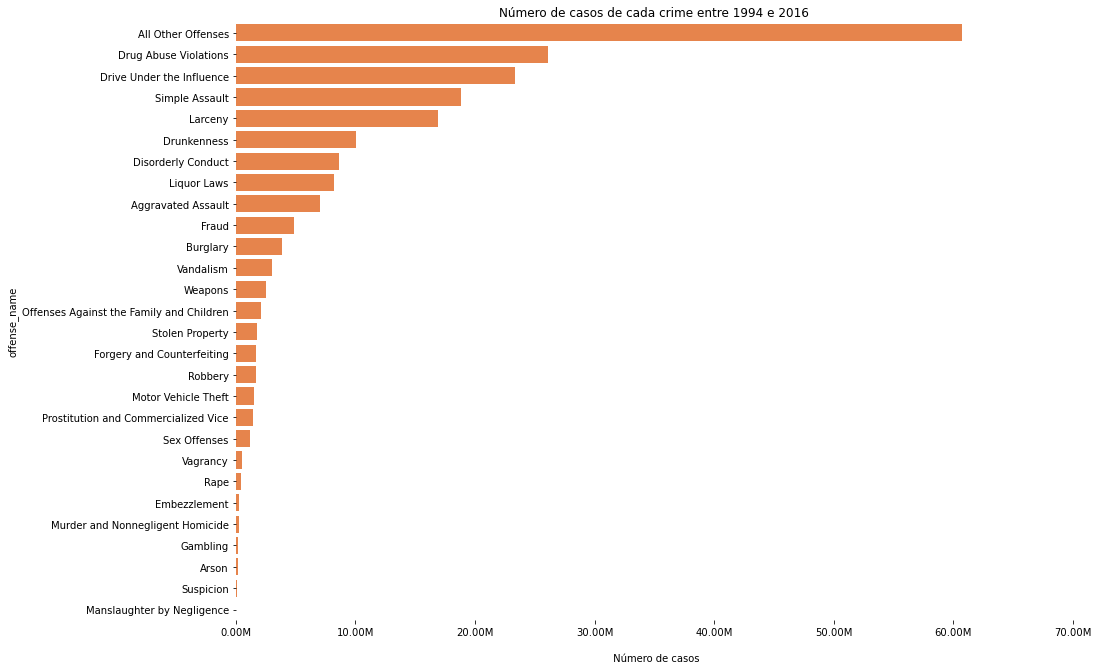

In [3]:
dados['total_pop_presa'] = dados['total_male'] + dados['total_female']
dados_prisoes = dados.groupby('offense_name').total_pop_presa.sum()
dados_prisoes = dados_prisoes.to_frame().reset_index().sort_values(by = 'total_pop_presa', ascending = False)
dados_prisoes

fig, ax = plt.subplots(figsize=(15,11))
ax = sns.barplot(data = dados_prisoes, x = 'total_pop_presa', y = 'offense_name', 
                 color='#FF7D33')
ax.set(xlabel = '\n Número de casos')
ax.set(xlim=(0, 70000000))
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels)
plt.title('Número de casos de cada crime entre 1994 e 2016')
plt.box(False)

### Adicionar uma análise do gráfico

Agora que sabemos quais foram os crimes mais cometidos durante os anos agregados, vejamos como os 10 crimes mais cometidos se comportaram durante cada ano específico. O gráfico de barras animado a seguir mostra exatamente isso:

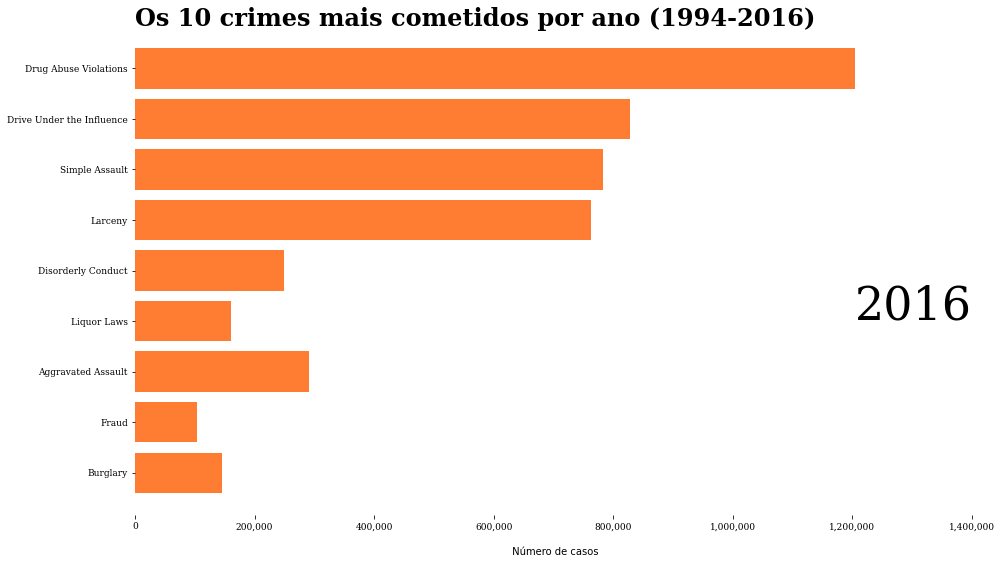

In [4]:
# Lista com os 10 crimes mais cometidos
my_list = ['Burglary', 'Fraud', 'Aggravated Assault', 'Liquor Laws', 'Disorderly Conduct', 'Drunkeness', 'Larceny',
           'Simple Assault', 'Drive Under the Influence', 'Drug Abuse Violations']

# Filtra a base de dados
filtro = dados["offense_name"].isin(my_list)
dados_filtrados = dados[filtro]

# Cria uma chave para manter a ordem das colunas em todas as frames
mapping = {offense: i for i, offense in enumerate(my_list)}
key = dados_filtrados['offense_name'].map(mapping)
dados_filtrados = dados_filtrados.iloc[key.argsort()]

# Cria a função que faz cada frame de acordo com o ano
fig, ax = plt.subplots(figsize=(15, 9))
def draw_barchart(year):
    dados_anos = dados_filtrados[dados_filtrados['year'].eq(year)]
    ax.clear()
    ax.barh(dados_anos['offense_name'], dados_anos['total_pop_presa'], color="#FF7D33")
    dx = dados_anos['total_pop_presa'].max()
    plt.box(False)
    ax.set(xlabel = '\n Número de casos')
    ax.set(xlim=(0, 1400000))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.rcParams.update({'font.size': 9, 'font.family': 'serif'})
    ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')
    ax.text(0, 1.0, 'Os 10 crimes mais cometidos por ano (1994-2016)',
            transform=ax.transAxes, size=24, weight=600, ha='left')

# Anima os gráficos 
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1994, 2017))
HTML(animator.to_jshtml())

### Adicionar uma análise do gráfico

O próximo gráfico que faremos diz respeito à porcentagem de homens e mulheres presos. Criamos as funções **proporcao_homens** e **proporcao_mulheres** que divide o total de homens ou mulheres na cadeia pelo equivalente das respectivas populações nos Estados Unidos. No processo, duas colunas novas são criadas.

In [9]:
def proporcao_homens(group):
    total_male = group.total_male.astype(float)
    population = group.population
    group['porcentagem_homens'] = total_male / (population*0.492)
    return group

def proporcao_mulheres(group):
    total_female = group.total_female.astype(float)
    population = group.population
    group['porcentagem_mulheres'] = total_female / (population*0.508)
    return group

dados = dados.groupby(['year']).apply(proporcao_mulheres)
dados = dados.groupby(['year']).apply(proporcao_homens)
dados

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,...,f_65p,race_agencies,race_population,white,black,asian_pacific_islander,american_indian,total_pop_presa,porcentagem_mulheres,porcentagem_homens
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,...,28.0,12581,263887632,4263,1373,103,183,5935,0.000011,0.000035
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,...,713.0,12581,263887632,183478,94982,5365,6129,291192,0.000499,0.001722
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,...,2344.0,12581,263887632,514297,237138,12418,14376,783371,0.001586,0.004381
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,...,170.0,12581,263887632,101778,39235,2035,1323,144967,0.000214,0.000893
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,...,928.0,12581,263887632,161655,73552,2556,9460,249299,0.000510,0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,416,NaN,1994,ASR_STP,Stolen Property,10713,208091172,84889,13994,8768,...,41.0,10282,207684879,56631,40612,875,568,98883,0.000132,0.000829
640,417,NaN,1994,ASR_SUS,Suspicion,10713,208091172,8230,1465,356,...,8.0,10282,207684879,4508,5116,26,41,9695,0.000014,0.000080
641,418,NaN,1994,ASR_VAG,Vagrancy,10713,208091172,14039,3782,922,...,16.0,10282,207684879,9716,7678,60,361,17821,0.000036,0.000137
642,419,NaN,1994,ASR_VAN,Vandalism,10713,208091172,117143,20803,12776,...,112.0,10282,207684879,96043,38502,1417,1708,137946,0.000197,0.001144


Em sequência, criamos uma nova tabela transformando a coluna *year* em índice e agrupando os percentuais de homens e mulheres nas prisões. Aqui é desconsiderada a desagregação por tipo de crime. Depois, fazemos o plot do gráfico.

<AxesSubplot:title={'center':'Porcentagem da população carcerária masculina e feminina em relação à população nacional, por ano'}, xlabel='year'>

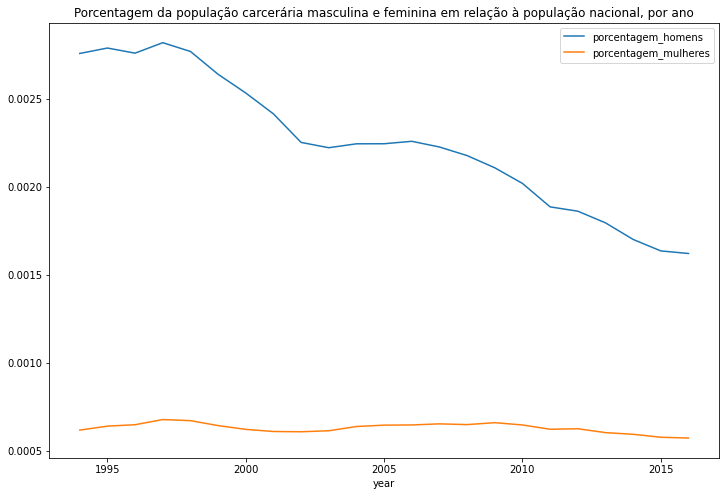

In [6]:
# tabela unindo os dados percentuais de gênero por ano (aqui, todos os percentuais de cada crime são somados)
dados_genero = dados.pivot_table(['porcentagem_homens', 'porcentagem_mulheres'], index = 'year')
dados_genero

# plot do gráfico
dados_genero.plot(title = "Porcentagem da população carcerária masculina e feminina em relação à população nacional, por ano", 
                  figsize = (12,8))

### Adicionar uma análise do gráfico

Agora trataremos da população carcerária a partir da perspectiva racial. Nesse caso, importa notar que os resultados estão em números absolutos. Na prática, isso implica um viés de análise que discutiremos mais a frente. No gráfico abaixo, fazemos uma visualização geral do número de brancos e pretos nas prisões. 

<AxesSubplot:title={'center':'Linha temporal da população carcerária, por raça'}, xlabel='year'>

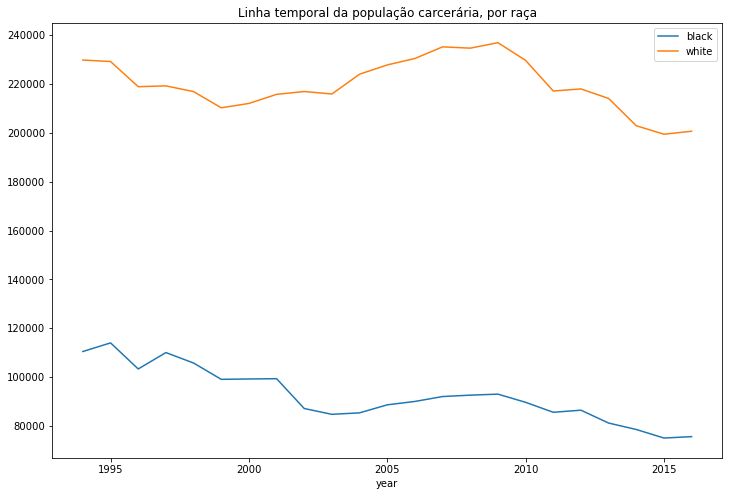

In [7]:
dados_raca = dados.pivot_table(['white', 'black'], index = 'year')
dados_raca.head()

dados_raca.plot(title = "Linha temporal da população carcerária, por raça", figsize = (12,8))

### Adicionar uma análise do gráfico

Para dar continuidade à análise, desagregaremos os dados para alguns crimes específicos. Começamos criando uma lista de crimes cujas informações desejamos visualizar graficamente. Em seguida, filtramos a base de dados para que tenhamos somente as colunas importantes nessa análise em específico. Após agruparmos os dados pelo tipo de crime, podemos plotar os gráficos.

Text(0.5, 1.0, 'Simple Assault')

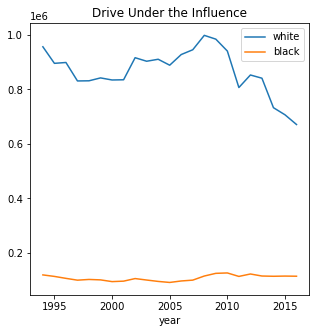

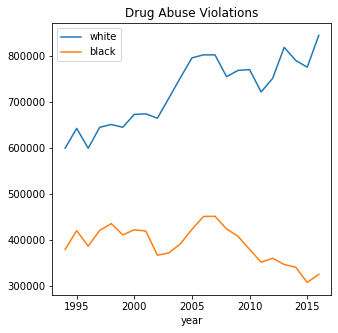

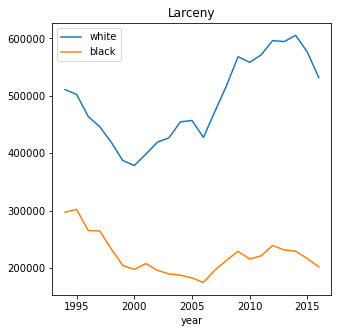

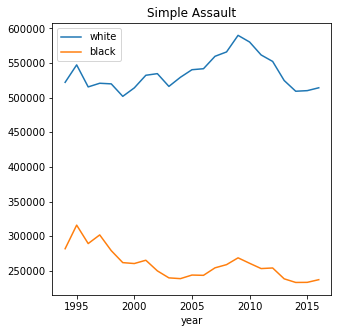

In [18]:
# Gráfico com números absolutos

# crio uma lista dos crimes e um filtro
crimes = ['Drug Abuse Violations', 'Drive Under the Influence', 'Simple Assault', 'Larceny']
flt = dados['offense_name'].isin(crimes)

# seleciono as colunas que quero, aplico o filtro e torno 'year' meu novo index
dados_crimes = dados[["year", "offense_name", "white", "black"]]
dados_crimes = dados_crimes[flt]
dados_crimes = dados_crimes.set_index('year')

# agrupo os dados pelos crimes
dados_crimes = dados_crimes.groupby(['offense_name'])

# crio os gráficos e adiciono títulos específicos a cada plot
graficos = dados_crimes.plot(figsize = (5, 5))
graficos
graficos[0].set_title('Drive Under the Influence')
graficos[1].set_title('Drug Abuse Violations')
graficos[2].set_title('Larceny')
graficos[3].set_title('Simple Assault') 

### Adicionar uma análise do gráfico

Mas, como dissemos, a análise dos dados a partir de números absolutos é enviesada. Afinal, não se pode desconsiderar que a quantidade de brancos e pretos nos Estados Unidos pode diferir. Aliás, diferem bastante: brancos representam 76% da população, enquanto pretos são somente 13.5%. Em outras palavras, se visualizarmos somente os números absolutos, teremos a falsa impressão de que negros estão sub-representados nas prisões, ao mesmo tempo que há sobre-representação de brancos. 

Se reorientarmos a análise considerando as discrepâncias populacionais de cada raça, é provável que observemos um cenário diferente. O código abaixo faz basicamente o mesmo que o código relativo às funções que criam as colunas para proporção de homens e mulheres nas prisões.

In [20]:
def proporcao_black(group):
    black = group.black.astype(float)
    population = group.population
    group['proporcao_black'] = black / (population*0.135)
    return group

def proporcao_white(group):
    white = group.white.astype(float)
    population = group.population
    group['proporcao_white'] = white / (population*0.76)
    return group

dados_1 = dados.groupby(['year']).apply(proporcao_black)
dados = dados_1.groupby(['year']).apply(proporcao_white)
dados.head()

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,...,race_population,white,black,asian_pacific_islander,american_indian,total_pop_presa,porcentagem_mulheres,porcentagem_homens,proporcao_black,proporcao_white
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161,...,263887632,4263,1373,103,183,5935,0.000011,0.000035,0.000038,0.000021
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780,...,263887632,183478,94982,5365,6129,291192,0.000499,0.001722,0.002660,0.000913
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018,...,263887632,514297,237138,12418,14376,783371,0.001586,0.004381,0.006640,0.002558
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077,...,263887632,101778,39235,2035,1323,144967,0.000214,0.000893,0.001099,0.000506
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997,...,263887632,161655,73552,2556,9460,249299,0.000510,0.001389,0.002060,0.000804


Podemos, agora, plotar nossos gráficos:

Text(0.5, 1.0, 'Simple Assault')

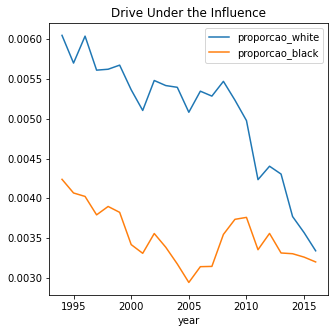

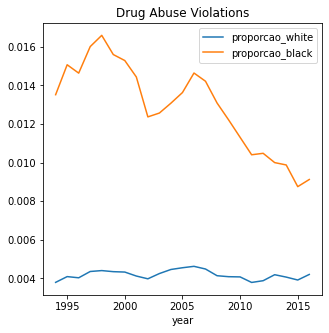

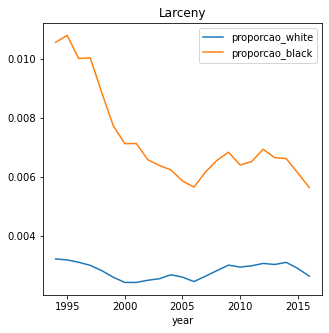

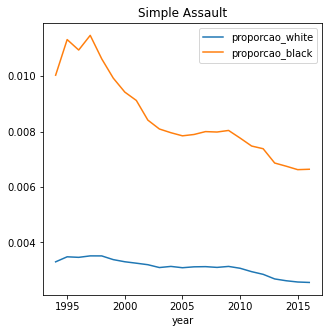

In [23]:
dados_crimes_2 = dados[["year", "offense_name", "proporcao_white", "proporcao_black"]]
dados_crimes_2 = dados_crimes_2[flt]
dados_crimes_2 = dados_crimes_2.set_index('year')

dados_crimes_2

# agrupo os dados pelos crimes
dados_crimes_2 = dados_crimes_2.groupby(['offense_name'])

# crio os gráficos e adiciono títulos específicos a cada plot
graficos_prop = dados_crimes_2.plot(figsize = (5, 5))
graficos_prop[0].set_title('Drive Under the Influence')
graficos_prop[1].set_title('Drug Abuse Violations')
graficos_prop[2].set_title('Larceny')
graficos_prop[3].set_title('Simple Assault') 

### Adicionar uma análise do gráfico

O gráfico a seguir nos fornece um panorama mais geral da quantidade de brancos e negros nas prisões no recorte temporal referido, considerando os crimes em geral.

<AxesSubplot:title={'center':'Porcentagem da população carcerária dividida por raça a cada ano'}, xlabel='year'>

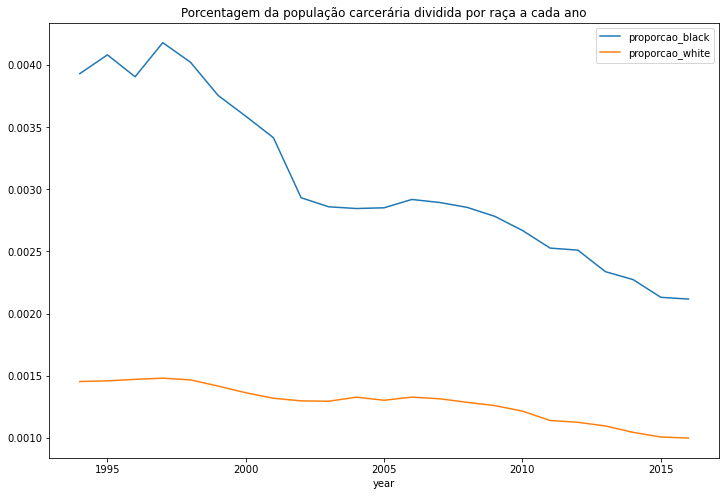

In [12]:
dados_raca_2 = dados.pivot_table(['proporcao_white', 'proporcao_black'], index = 'year')
dados_raca_2

dados_raca_2.plot(title = "Porcentagem da população carcerária dividida por raça a cada ano", figsize = (12,8))

A base de dados em análise ainda traz dados sobre a idade da população carcerária. O código abaixo faz esse mapeamento através de um *heatmap*:

", linewidth=0.1,linecolor = 'white'"

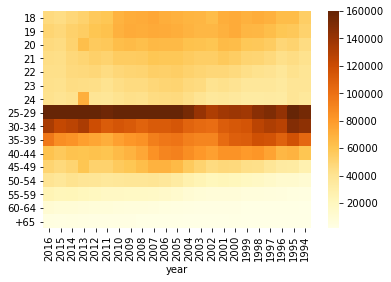

In [18]:
dados_heatmap = dados[dados["offense_name"] == "Drug Abuse Violations"]
lista_indexes_m = ["year"]
lista_indexes_f = ["year"]
labels = [18,19,20,21,22,23,24,"25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","+65"]
for dado in dados:
    if dado[0] == "f": 
        lista_indexes_f.append(dado)
    elif dado[0] == "m":
        lista_indexes_m.append(dado)

dados_heatmap_m = dados_heatmap[lista_indexes_m]
dados_heatmap_f = dados_heatmap[lista_indexes_f]

a = dados_heatmap_m.T
a.columns = a.iloc[0]
a = a.drop("year")

for vezes in range(23):
    cols = list(a.columns)
    cols = [cols[-1]] + cols[:-1]
    a = a[cols]

sns.heatmap(a, cmap = "YlOrBr",vmax = 160000,yticklabels = labels)
""", linewidth=0.1,linecolor = 'white'"""